# 데이터 전처리 종류

- 데이터 클리닝(결측치, 틀린값 처리)
- 스케일링
- 이상치처리
- 데이터 변환

## 데이터 클리닝
### 결측치 처리(틀린 값 처리도 동일)
- 값이 비어있는 것(nan)을 의미
- 처리하는 세가지 방법
    - 결측치가 포함된 샘플(행)을 버린다
    - 결측치를 적절한 값으로 대체한다(평균 or 0 )
    - 결측치 처리를 다음 분석 단계로 넘긴다. 즉 그대로 둔다
 
 

In [60]:
import numpy as np
import pandas as pd
%matplotlib inline

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt
# 그래프 한글 처리하는 코드
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':  # 맥OS 
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows': 
    # 윈도우   
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system...  sorry~~~')

In [4]:
# 실습 데이터 생성
# 키와 몸무게 데이터
# 평균 170, 65 표준편차 4cm, 5kg
n_sample = 1000
height = 4*np.random.randn(n_sample).round(2) + 170
weight = 5*np.random.randn(n_sample).round(2) + 65

# df 생성
df_raw = pd.DataFrame({'키':height, '몸무게':weight})
df_raw.head()

,키,몸무게
0,167.20,71.75
1,172.00,67.50
2,172.44,71.60
3,163.84,65.35
4,168.04,70.45


In [5]:
df = df_raw.copy() # 원본 백업

In [9]:
df['키'].mean()
df['몸무게'].mean()
df['키'].std()
df['몸무게'].std()

4.911550272172328

<AxesSubplot:ylabel='Count'>

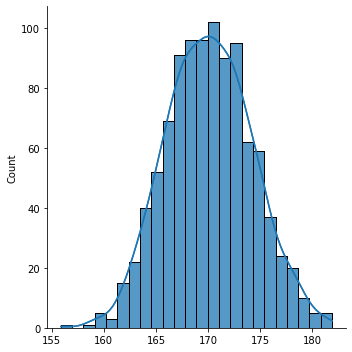

In [13]:
# 샘플의 확률분포 근사 그래프 보기
sns.displot(df.키.values, kde=True)
sns.histplot(df.키.values,kde=True)

### 결측치 처리 실습
 - 결측치 확인 -> np.isnull()
 - 결측치 치환 -> np.fillna()

In [15]:
# 임의의 값을 na 값으로 변경
df['몸무게'][3] = np.nan
df.head()

,키,몸무게
0,167.20,71.75
1,172.00,67.50
2,172.44,71.60
3,163.84,NaN
4,168.04,70.45


In [19]:
# 결측치 갯수 세기
df.isnull().sum()

키      0
몸무게    1
dtype: int64

In [20]:
# 결측치가 있는 SAMPLE 삭제 : dropna() 함수 사용
df2 = df.dropna() # na가 있는 행은 모두 지운다
print(df2.shape)
df2.head()

(999, 2)


,키,몸무게
0,167.20,71.75
1,172.00,67.50
2,172.44,71.60
4,168.04,70.45
5,177.48,61.60


In [21]:
# 0으로 대체하는 경우
# 몸무게나 키가 0일 수는 없기 때문에 대체하면 안됨
df.fillna(0).head()

,키,몸무게
0,167.20,71.75
1,172.00,67.50
2,172.44,71.60
3,163.84,0.00
4,168.04,70.45


In [28]:
# 결측치를 다른 값으로 대체하기
# 평균으로 대체하기
# 키와 몸무게 데이터는 평균으로 대체하는 경우가 많음
df3 = df.fillna(df['몸무게'].mean())
df3.head()

,키,몸무게
0,167.20,71.750000
1,172.00,67.500000
2,172.44,71.600000
3,163.84,65.183333
4,168.04,70.450000


In [29]:
# 결측치를 다른 값으로 대체하기
# 결측치 행의 주변값으로 대체하기
# 날씨와 관련된 데이터 등 시계열 데이터인 경우 많이 사용
# fillna(mathod='ffill/bfill') : forwardfill or bacjwardfill
df.fillna(method='ffill').head()

,키,몸무게
0,167.20,71.75
1,172.00,67.50
2,172.44,71.60
3,163.84,71.60
4,168.04,70.45


## 스케일링
- 여러 변수 값의 범위가 서로 다른 경우 데이터 분석에 동일한 비중으로 반영되도록 하기 위해 동일한 범위로 변환하는 과정
- 표준 스케일링을 가장 많이 사용 (평균:0. 표준편차:1)
- 표준 스케일링을 했다고 분포가 변하지는 않는다.분포 형태는 그대로 유지
- 값의 최소치와 최대치가 정해진 경우 min-max 스케일링도 자주 사용(최소값을 0, 최대값을 1로
    - ex) 전압이 0-5만 나올 때
- 표준스케일링 : 관측치-평균/표준편차

In [31]:
# 키와 몸무게 데이터를 각각 표준 스케일링한 후 컬럼에 추가
# fit_transform()
df=df_raw.copy() # 결측치 없는 데이터 사용

In [40]:
from sklearn.preprocessing import StandardScaler # 표준 스케일링 함수
scale = StandardScaler() # 생성자 호출해서 객체 생성, 함수의 기능을 scale에 전수
df[['키_sc','몸무게_sc']]=scale.fit_transform(df[['키','몸무게']])
df

,키,몸무게,키_sc,몸무게_sc
0,167.20,71.75,-0.709669,1.337620
1,172.00,67.50,0.460420,0.471879
2,172.44,71.60,0.567678,1.307064
3,163.84,65.35,-1.528731,0.033917
4,168.04,70.45,-0.504903,1.072805
...,...,...,...,...
995,168.96,68.70,-0.280636,0.716324
996,167.96,67.70,-0.524405,0.512620
997,174.68,67.50,1.113720,0.471879
998,173.56,61.35,0.840699,-0.780898


In [41]:
# scale의 평균, 표준편차
scale.mean_, scale.scale_

(array([170.11124,  65.1835 ]), array([4.10225285, 4.90909388]))

In [44]:
df['몸무게_sc'].mean() # 1.0116352200384427e-15 거의 0에 가까움

1.0116352200384427e-15

In [48]:
# 스케일링 이전의 원래 값으로 환원
# inverse_transform() 사용
scale.inverse_transform(df[['키_sc','몸무게_sc']])[:5]

array([[167.2 ,  71.75],
       [172.  ,  67.5 ],
       [172.44,  71.6 ],
       [163.84,  65.35],
       [168.04,  70.45]])

<AxesSubplot:ylabel='Density'>

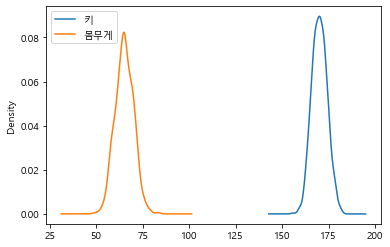

In [62]:
# 데이터 분포 시각화
df[['키','몸무게']].plot.kde() # 히스토그램에 가장 근접한 확률분포 함수를 이용한 그래프 그림
# 두개의 데이터의 범위가 다르게 나타남

<AxesSubplot:ylabel='Density'>

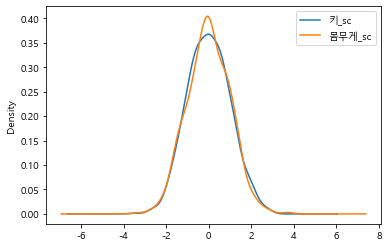

In [63]:
df[['키_sc','몸무게_sc']].plot.kde()

In [57]:
# min-max 스케일링 (데이터의 최소값이 0 최대값이 1이 되도록 조정)
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df[['키_nx','몸무게_nx']] = minmax.fit_transform(df[['키','몸무게']])
df.head()

,키,몸무게,키_sc,몸무게_sc,키_nx,몸무게_nx
0,167.20,71.75,-0.709669,1.337620,0.435385,0.656695
1,172.00,67.50,0.460420,0.471879,0.620000,0.535613
2,172.44,71.60,0.567678,1.307064,0.636923,0.652422
3,163.84,65.35,-1.528731,0.033917,0.306154,0.474359
4,168.04,70.45,-0.504903,1.072805,0.467692,0.619658


<AxesSubplot:ylabel='Density'>

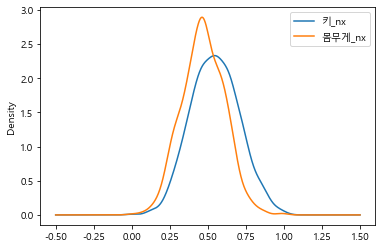

In [64]:
df[['키_nx','몸무게_nx']].plot.kde()

In [66]:
df['키_nx'].min()

0.0

In [80]:
# 이상치가 포함될 경우
# 이상치가 포함된 키 데이터 생성 키_1
키_1 = height.copy()
키_1[0] = 200
df['키_1'] = 키_1
df

,키,몸무게,키_sc,몸무게_sc,키_nx,몸무게_nx,키_1,키_1_sc,키_1_nx
0,167.20,71.75,-0.709669,1.337620,0.435385,0.656695,200.00,31.477620,1.000000
1,172.00,67.50,0.460420,0.471879,0.620000,0.535613,172.00,0.010048,0.011163
2,172.44,71.60,0.567678,1.307064,0.636923,0.652422,172.44,0.019743,0.011467
3,163.84,65.35,-1.528731,0.033917,0.306154,0.474359,163.84,-0.169767,0.005512
4,168.04,70.45,-0.504903,1.072805,0.467692,0.619658,168.04,-0.077215,0.008420
...,...,...,...,...,...,...,...,...,...
995,168.96,68.70,-0.280636,0.716324,0.503077,0.569801,168.96,-0.056942,0.009057
996,167.96,67.70,-0.524405,0.512620,0.464615,0.541311,167.96,-0.078978,0.008365
997,174.68,67.50,1.113720,0.471879,0.723077,0.535613,174.68,0.069104,0.013018
998,173.56,61.35,0.840699,-0.780898,0.680000,0.360399,173.56,0.044424,0.012243


In [ ]:
# 이상치가 포함된 데이터(컬럼)에 표준 스케일링 적용

In [81]:
df['키_1_sc'] = scale.fit_transform(df[['키_1']])
df.head()

,키,몸무게,키_sc,몸무게_sc,키_nx,몸무게_nx,키_1,키_1_sc,키_1_nx
0,167.20,71.75,-0.709669,1.337620,0.435385,0.656695,200.00,7.094046,1.000000
1,172.00,67.50,0.460420,0.471879,0.620000,0.535613,172.00,0.440993,0.011163
2,172.44,71.60,0.567678,1.307064,0.636923,0.652422,172.44,0.545541,0.011467
3,163.84,65.35,-1.528731,0.033917,0.306154,0.474359,163.84,-1.497897,0.005512
4,168.04,70.45,-0.504903,1.072805,0.467692,0.619658,168.04,-0.499939,0.008420


<AxesSubplot:ylabel='Density'>

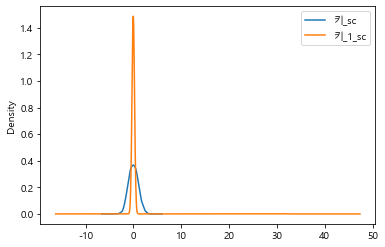

In [76]:
df[['키_sc','키_1_sc']].plot.kde()

In [82]:
df['키_1_nx'] = minmax.fit_transform(df[['키_1']])
df.head()

,키,몸무게,키_sc,몸무게_sc,키_nx,몸무게_nx,키_1,키_1_sc,키_1_nx
0,167.20,71.75,-0.709669,1.337620,0.435385,0.656695,200.00,7.094046,1.000000
1,172.00,67.50,0.460420,0.471879,0.620000,0.535613,172.00,0.440993,0.365367
2,172.44,71.60,0.567678,1.307064,0.636923,0.652422,172.44,0.545541,0.375340
3,163.84,65.35,-1.528731,0.033917,0.306154,0.474359,163.84,-1.497897,0.180417
4,168.04,70.45,-0.504903,1.072805,0.467692,0.619658,168.04,-0.499939,0.275612


<AxesSubplot:ylabel='Density'>

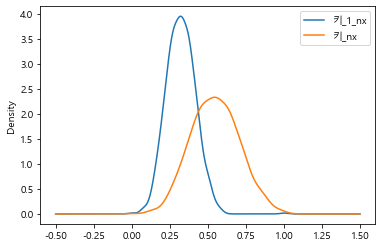

In [83]:
df[['키_1_nx','키_nx']].plot.kde()
# 이상치 하나때문에 데이터의 다른 값들이 크게 달라지게 됨
# 정상치 데이터와 이상치 포함 데이터 분포 결과가 달라진다는 건 입력되는 데이터가 달라지게 됨
# minmax 스케일링은 범위가 명확하다는 전제가 있어야함

## 이상치 처리
- 경험이 많이 필요
- 이상치 처리 목적
    - 이상치를 제거해 데이터의 분석의 정확도를 높이기 위해
    - 이상치를 찾는 것이 목적인 경우
        - ex) 기기 이상을 찾기 위해
        - ex) 대출 및 금융 관련
- boxplot를 보면 이상치 존재 파악이 쉽다
- 표준스케일링한 후 값이 큰 것들(6 이상)을 이상치로 봄

<AxesSubplot:>

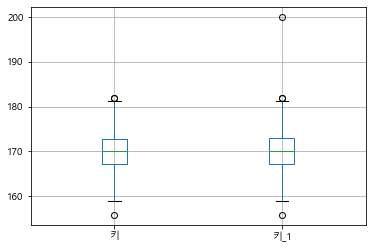

In [85]:
# 이상치가 없는 경우와 있는 경우의 박스 플롯
df[['키','키_1']].boxplot()

<AxesSubplot:>

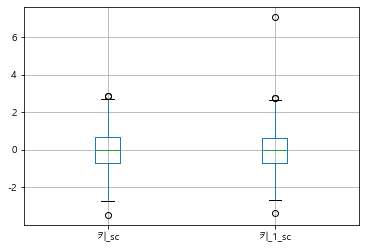

In [86]:
# 스케일링된 데이터를 비교
df[['키_sc','키_1_sc']].boxplot()

## 데이터변환
- 데이터의 입출력이 선형적일 때 가장 예측하기가 쉽기에 변환이 필요
### 로그 변환

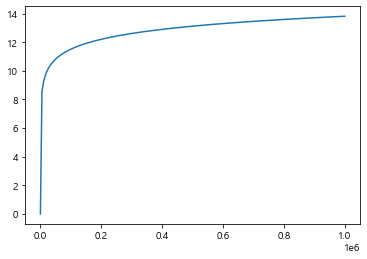

In [89]:
x = np.linspace(1,1000000,200)
y = np.log(x)
plt.plot(x,y)

### log_normal 분포
 - 어떤 값에 로그를 취하면 정규분포를 갖는 특성의 데이터

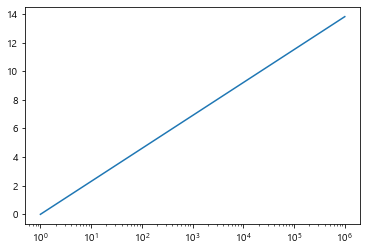

In [91]:
# x축을 log 스케일로 그리면(로그를 취하면)
plt.xscale('log')
plt.plot(x,y)

### 카테고리 인코딩
- 연속형 숫자 데이터를 카테고리형(범주형)으로 바꾸는 것
- ex) 실력이 늘어나면 용돈을 더준다
- 실력이 늘어나면 -> 등급이 올라가면과 같이 구간을 주어서 측정

In [ ]:
# 키 데이터를 이용해 등급을 나누기
# 표준편차를 기준으로
# 평균을 기준으로 + - 표준편차 
# small < 중심구간 - standard < tall

In [94]:
df[['키']].mean()
df[['키']].std()

키    4.104306
dtype: float64

In [96]:
min = df[['키']].mean() - df[['키']].std()
max = df[['키']].mean() + df[['키']].std()
min,max

(키    166.006934
 dtype: float64,
 키    174.215546
 dtype: float64)

In [ ]:
# tall 변수 구성비 확인
df['tall'].value.counts()
# 변수 구성비율 확인
df['tall'].value.counts()*100/len(df)

### 원 핫 인코딩
 - 카테고리 변수의 일반적인 표현 방법
    - 데이터 분석에서 모든 데이터는 숫자로 바꿔서 표현해야함
 - pd.get_dummies

In [ ]:
# tall 변수의 원핫인코딩
# 오리지널 값이 아니고 더미변수를 만들어서 자기가 갖고 있는 값에만 1이 되게 정리
df_tall = pd.get_dummies(df['tall'])
df_tall.head()

In [ ]:
# 데이터 프레임에 합치기(가로방향)
df_all = pd.concat((df,df_tall),axis=1)
df_all.head()

### 최종 사용데이터
- 여러가지 전처리된 데이터 중에서 필요한 부분만 선택하여 최종 데이터 분석에 사용
- 일부 컬럼 선택

In [97]:
# 모든 컬럼명 보기
df_all.columns

NameError: name 'df_all' is not defined

In [ ]:
X = df_all[['키_sc','몸무게_sc','large','small','standard']]